# Лабораторная работа №1: "Создание 'истории о данных' (Data Storytelling)."

## ИУ5-23 Зорин Арсений

**Задание:**
- Выбрать набор данных (датасет);
- История должна содержать не менее 5 шагов. Каждый шаг содержит график и его текстовую интерпретацию;
- На каждом шаге наряду с удачным итоговым графиком;
- Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов;
- Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика;
- История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [172]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

data = pd.read_csv('../datasets/spotify/RU.csv').explode('artists')

In [173]:
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [174]:
data['release_year'] = pd.to_datetime(data.release_date, format='%Y-%m-%d', errors='ignore').dt.year
data['artists'] = data['artists'].apply(eval)
data = data.explode('artists')

In [175]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
count,125317.000000,1.253170e+05,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000,125317.000000
mean,23.360637,2.341997e+05,0.051629,0.517267,0.456626,5.207506,-12.373260,0.662272,0.119074,0.567084,0.233090,0.218489,0.499193,115.094285,3.829425,1971.343609
std,22.769162,1.567399e+05,0.221278,0.181540,0.283509,3.511126,6.018742,0.472937,0.202009,0.393972,0.352066,0.178932,0.269416,30.061091,0.557320,28.970772
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000
25%,0.000000,1.622200e+05,0.000000,0.385000,0.213000,2.000000,-15.954000,0.000000,0.037100,0.112000,0.000002,0.103000,0.272000,91.813000,4.000000,1947.000000
50%,18.000000,2.016400e+05,0.000000,0.527000,0.411000,5.000000,-11.478000,1.000000,0.048000,0.706000,0.002190,0.146000,0.506000,114.307000,4.000000,1968.000000
75%,41.000000,2.659730e+05,0.000000,0.657000,0.699000,8.000000,-7.803000,1.000000,0.084200,0.957000,0.481000,0.287000,0.724000,132.998000,4.000000,1996.000000
max,100.000000,4.800118e+06,1.000000,0.988000,1.000000,11.000000,4.584000,1.000000,0.971000,0.996000,0.999000,0.999000,1.000000,243.372000,5.000000,2021.000000


<AxesSubplot:>

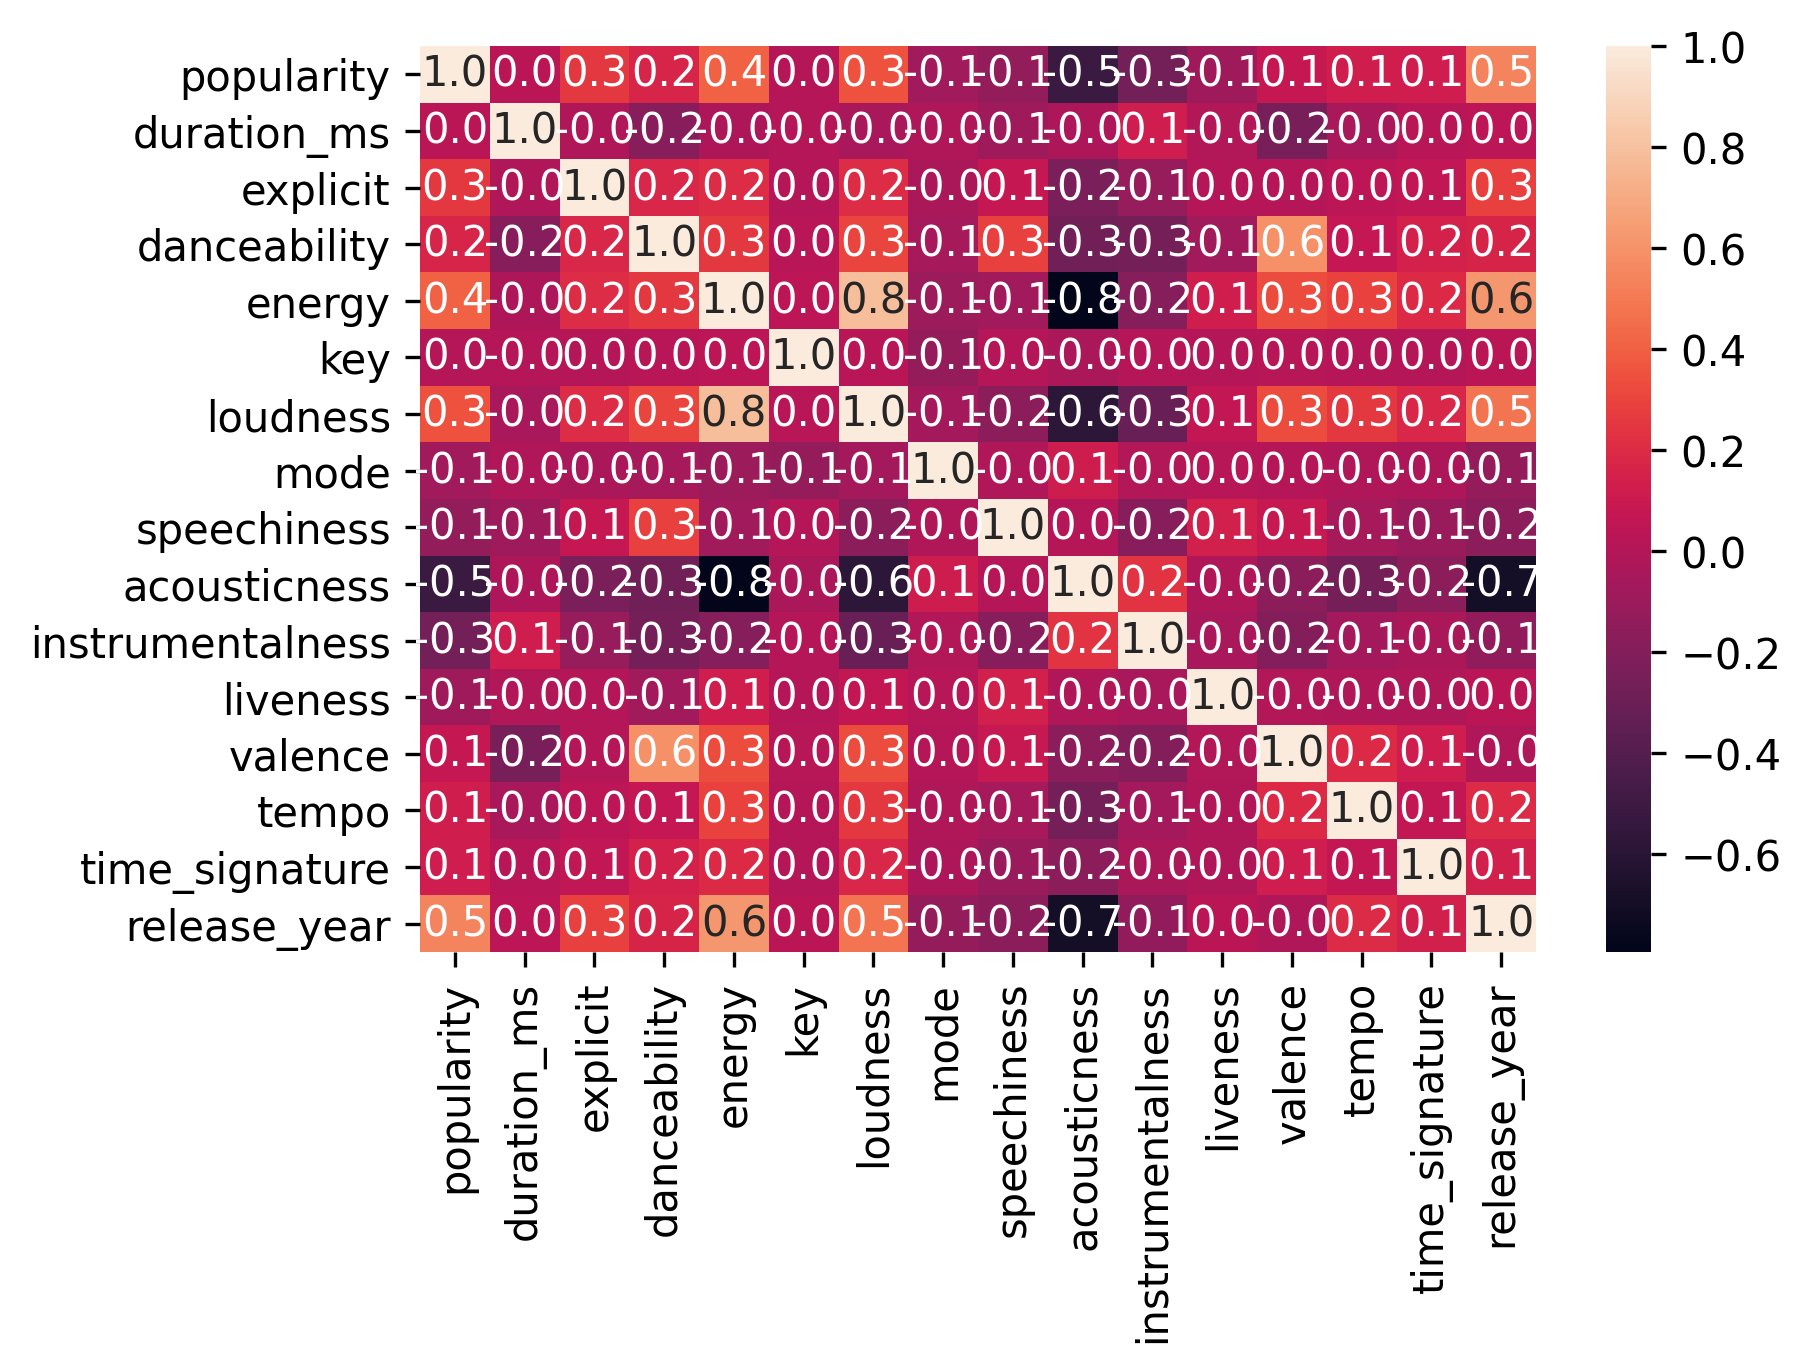

In [176]:
sns.heatmap(data.corr(), annot=True, fmt='.1f')

Популярность композиции в большей степени завист от трех параметров: энергичность (energy), уровень громкости (loudness) и акустичность (acousticness). При этом параметры энергичность и уровня громкости имеют достаточно высокий уровень кореллляции равный 0.8. Именно поэтому оставим параметр энергичности, который сильнее всего кореллирует с целевым значением популярности.

<AxesSubplot:>

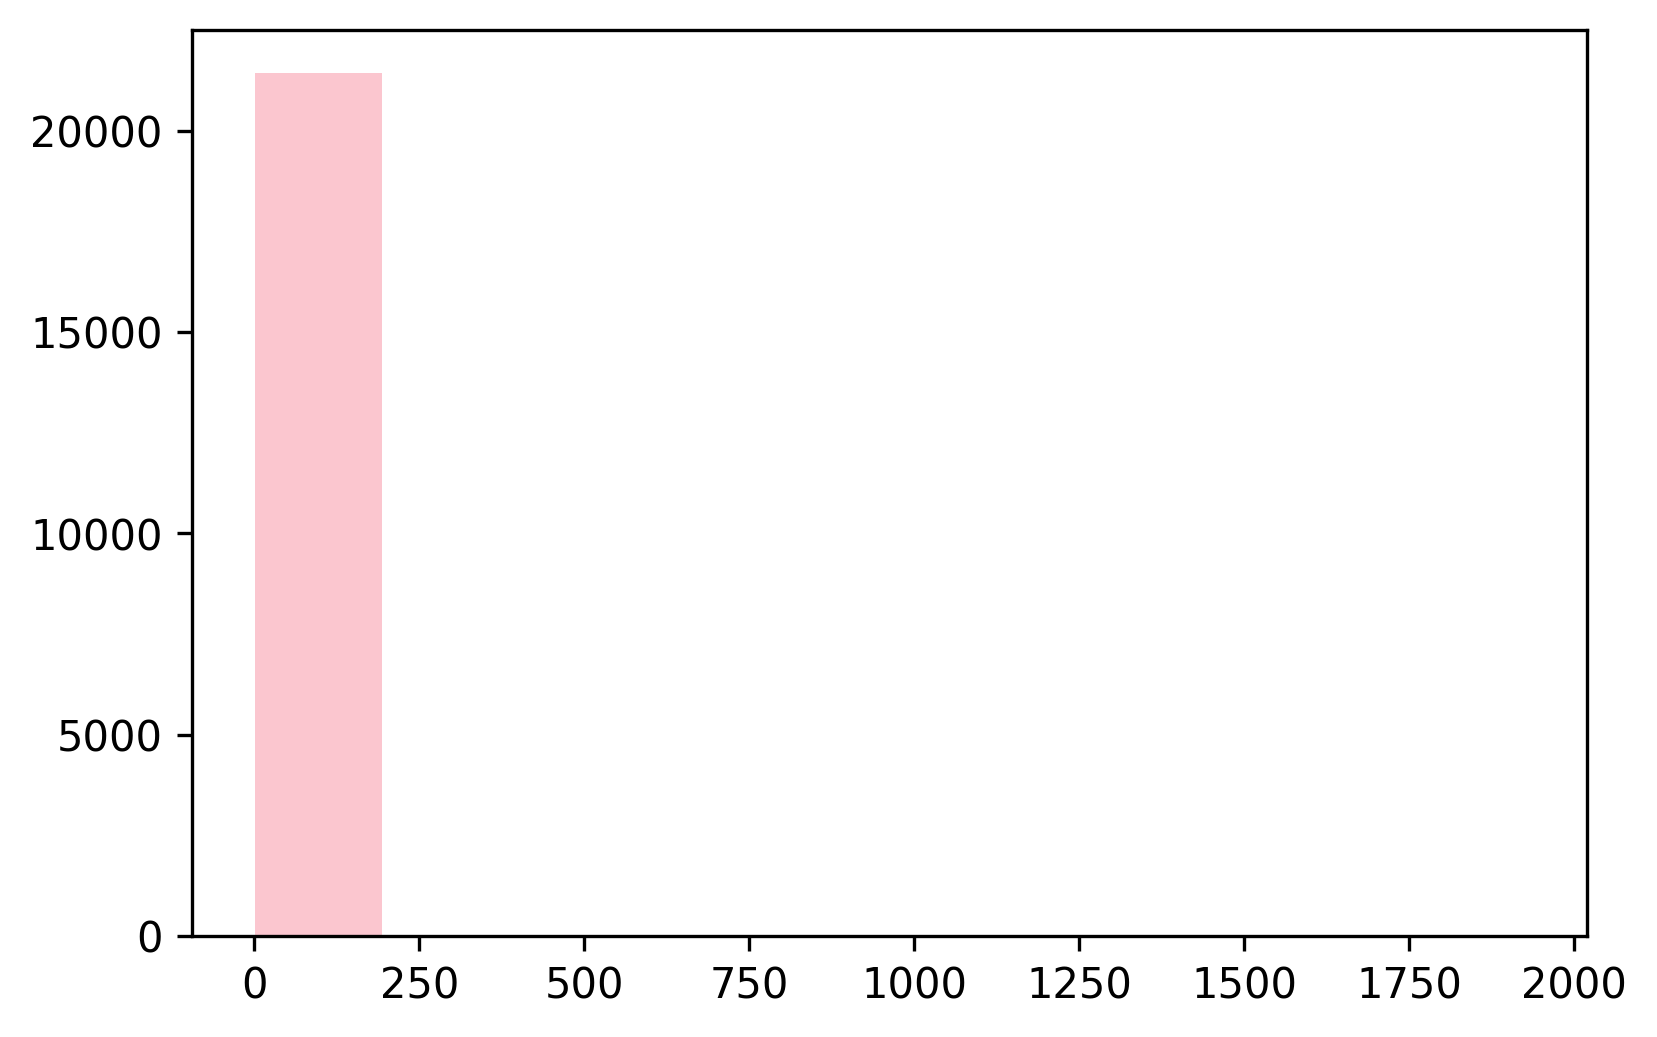

In [177]:
sns.distplot(x=data['artists'].value_counts(), kde=False, bins=10)

На графике распределения количества композиций у артистов видно, что присутствую сильные выбросы и большинство исполнителей имеют менее 250 композиций. Для возможности удаления из исходных данных исполнителей с большим кол-вом композиций необходимо изучить зависимость медианной популярности от кол-ва песен.

<AxesSubplot:>

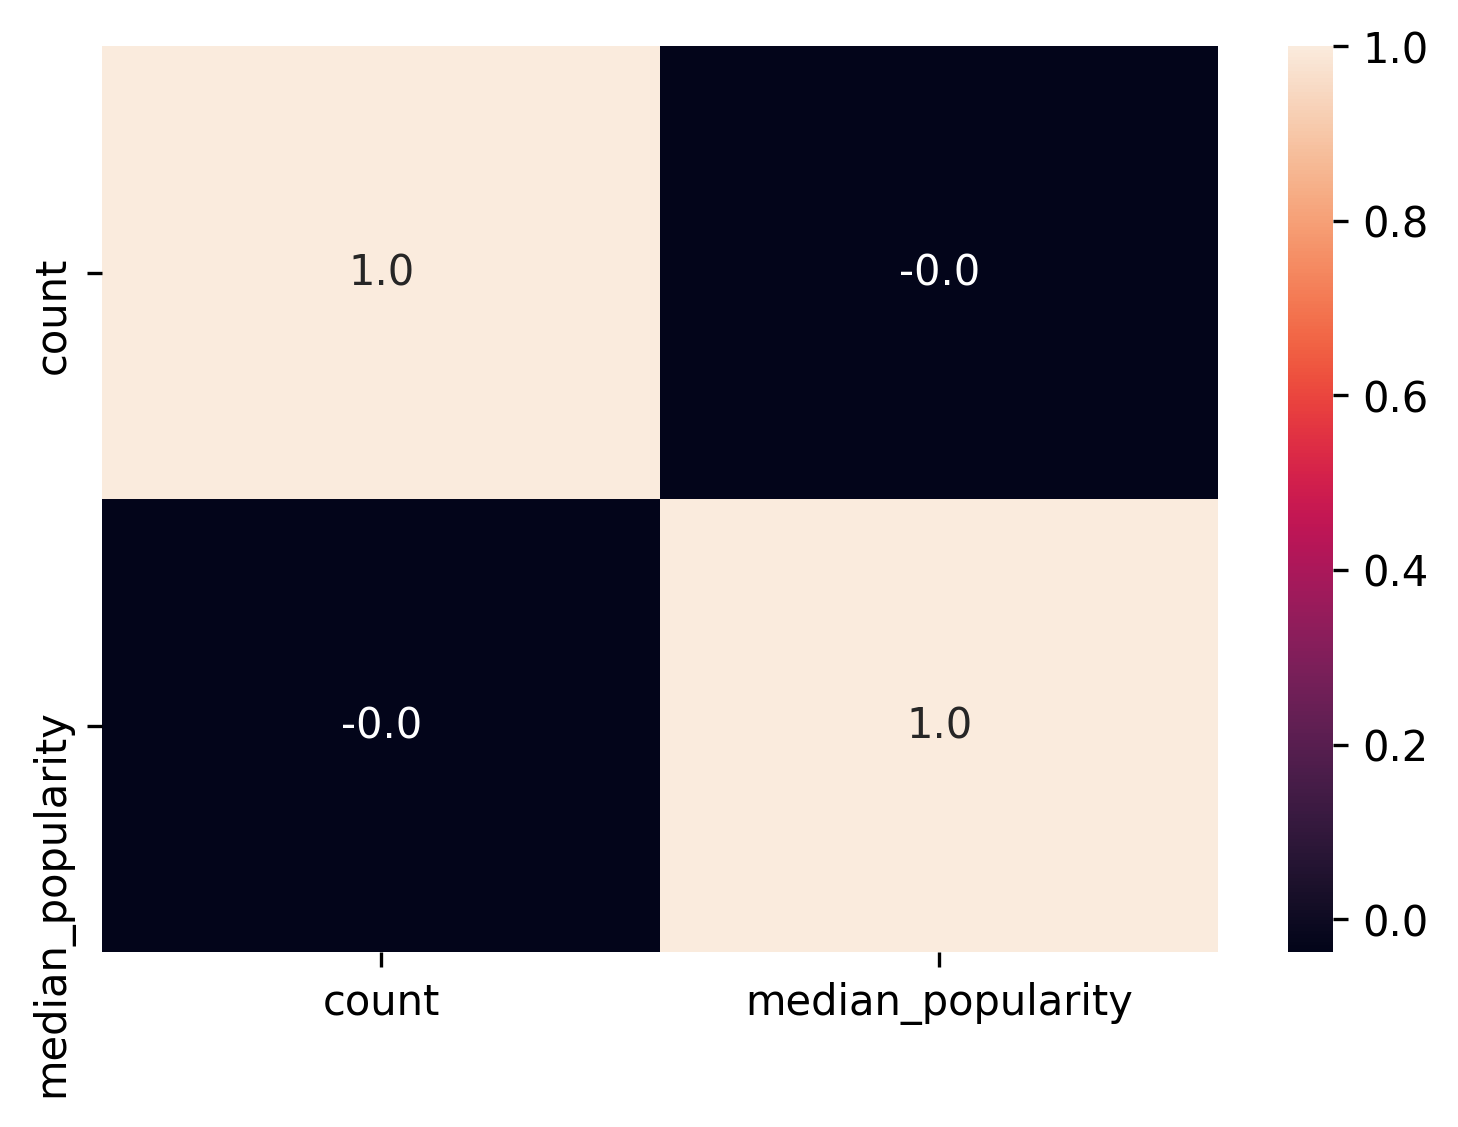

In [178]:
artists_stat = data.groupby('artists') \
       .agg({'name':'count', 'popularity':'median'}) \
       .rename(columns={'name':'count','popularity':'median_popularity'}) \
       .reset_index()

sns.heatmap(artists_stat.corr(), annot=True, fmt='.1f')

Кол-во записанных композиций не влияет на популярность исполнителя.

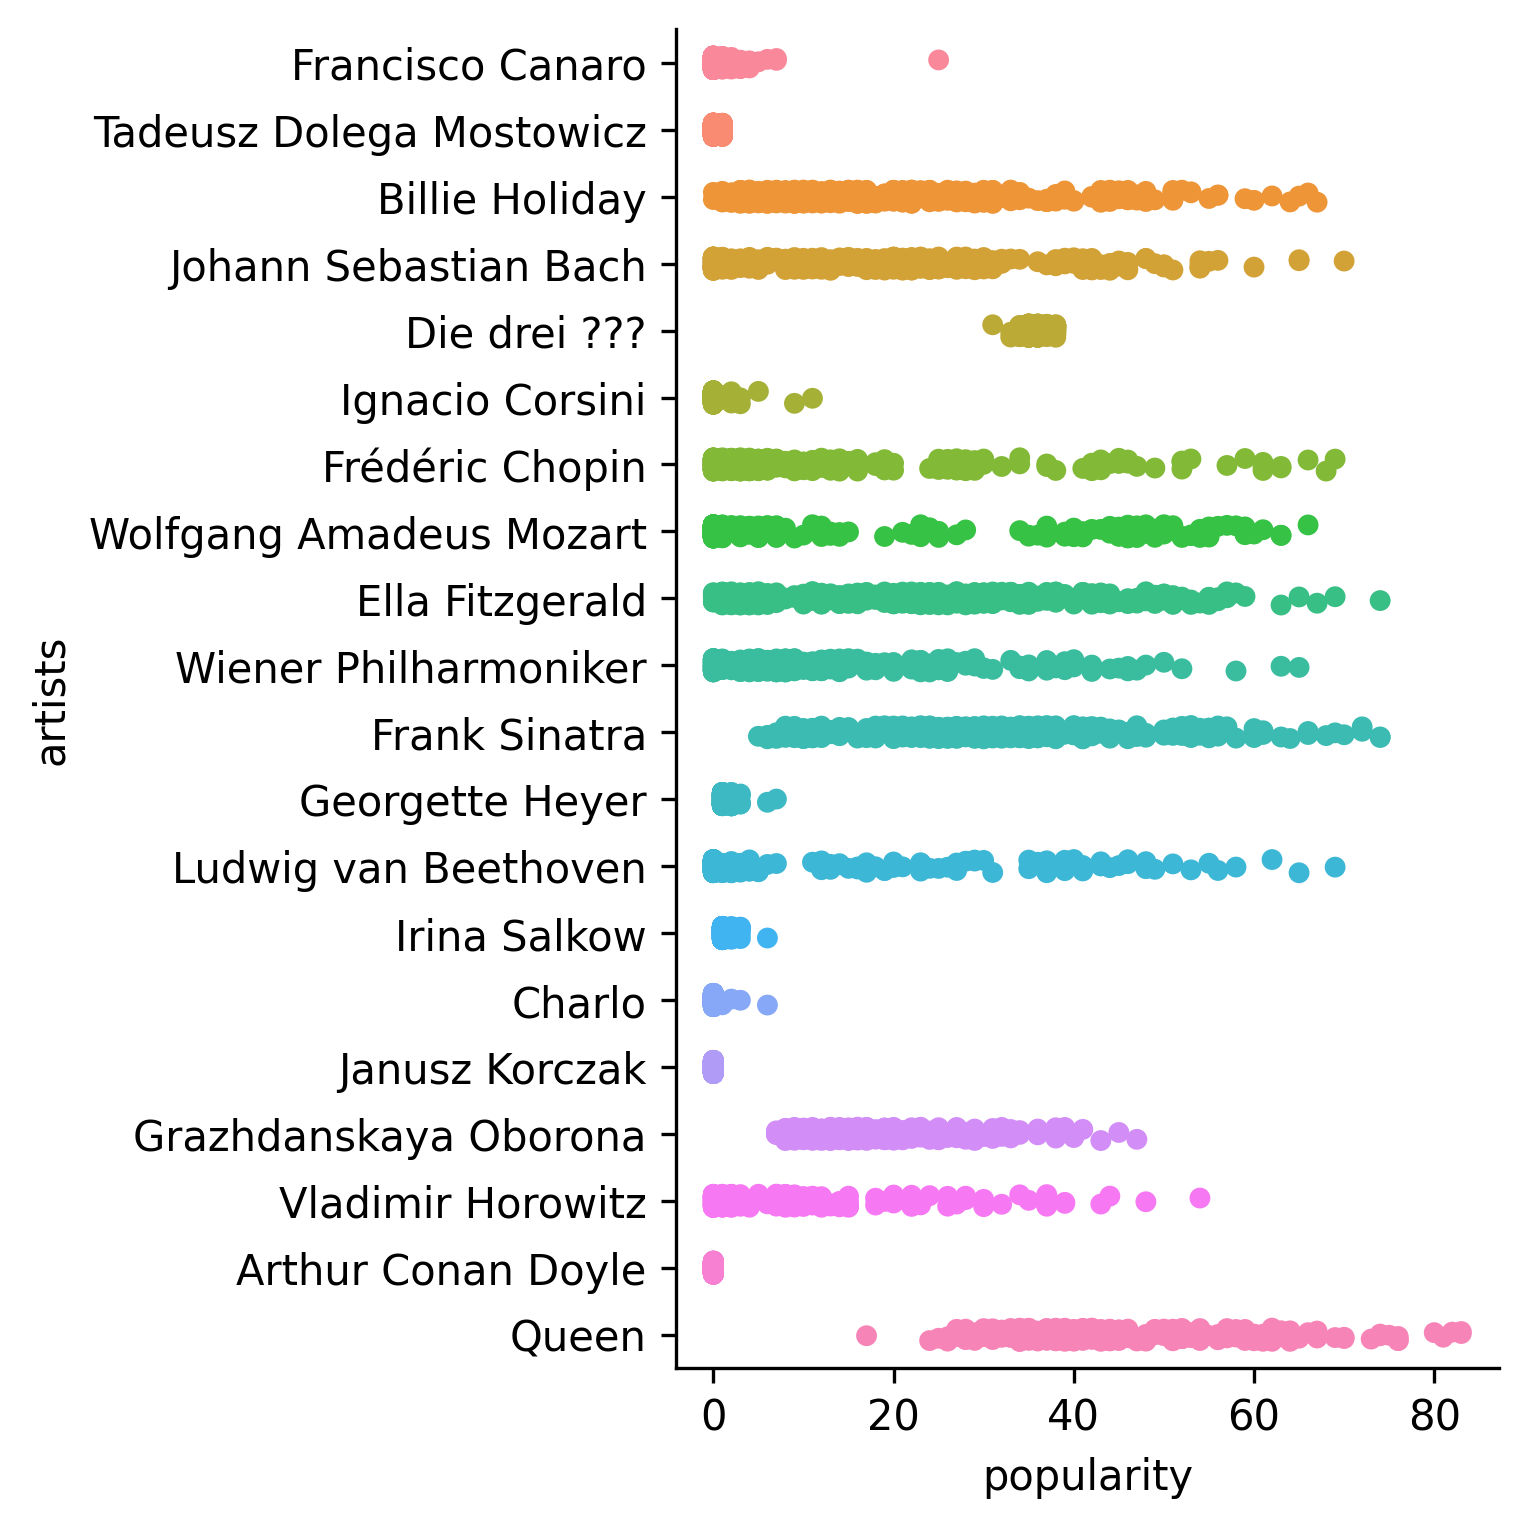

In [179]:
sns.catplot(x='popularity', y='artists', data=data, order=data.artists.value_counts().iloc[:20].index)

Из графика можно заметить, что 20 исполнителей, которые записали больше всего треков имеют как популяные, так и не популярные композиции. Из чего можно сделать вывод, что популярность композиции не складывается из популярности исполнителя.

Изменение популярности топ 10 артистов по кол-ву композиций с течением времени

In [180]:
songs_by_year_stat = data.groupby('release_year') \
       .agg({'name':'count', 'popularity':'median'}) \
       .rename(columns={'name':'count','popularity':'median_popularity'}) \
       .reset_index()

<AxesSubplot:xlabel='release_year', ylabel='count'>

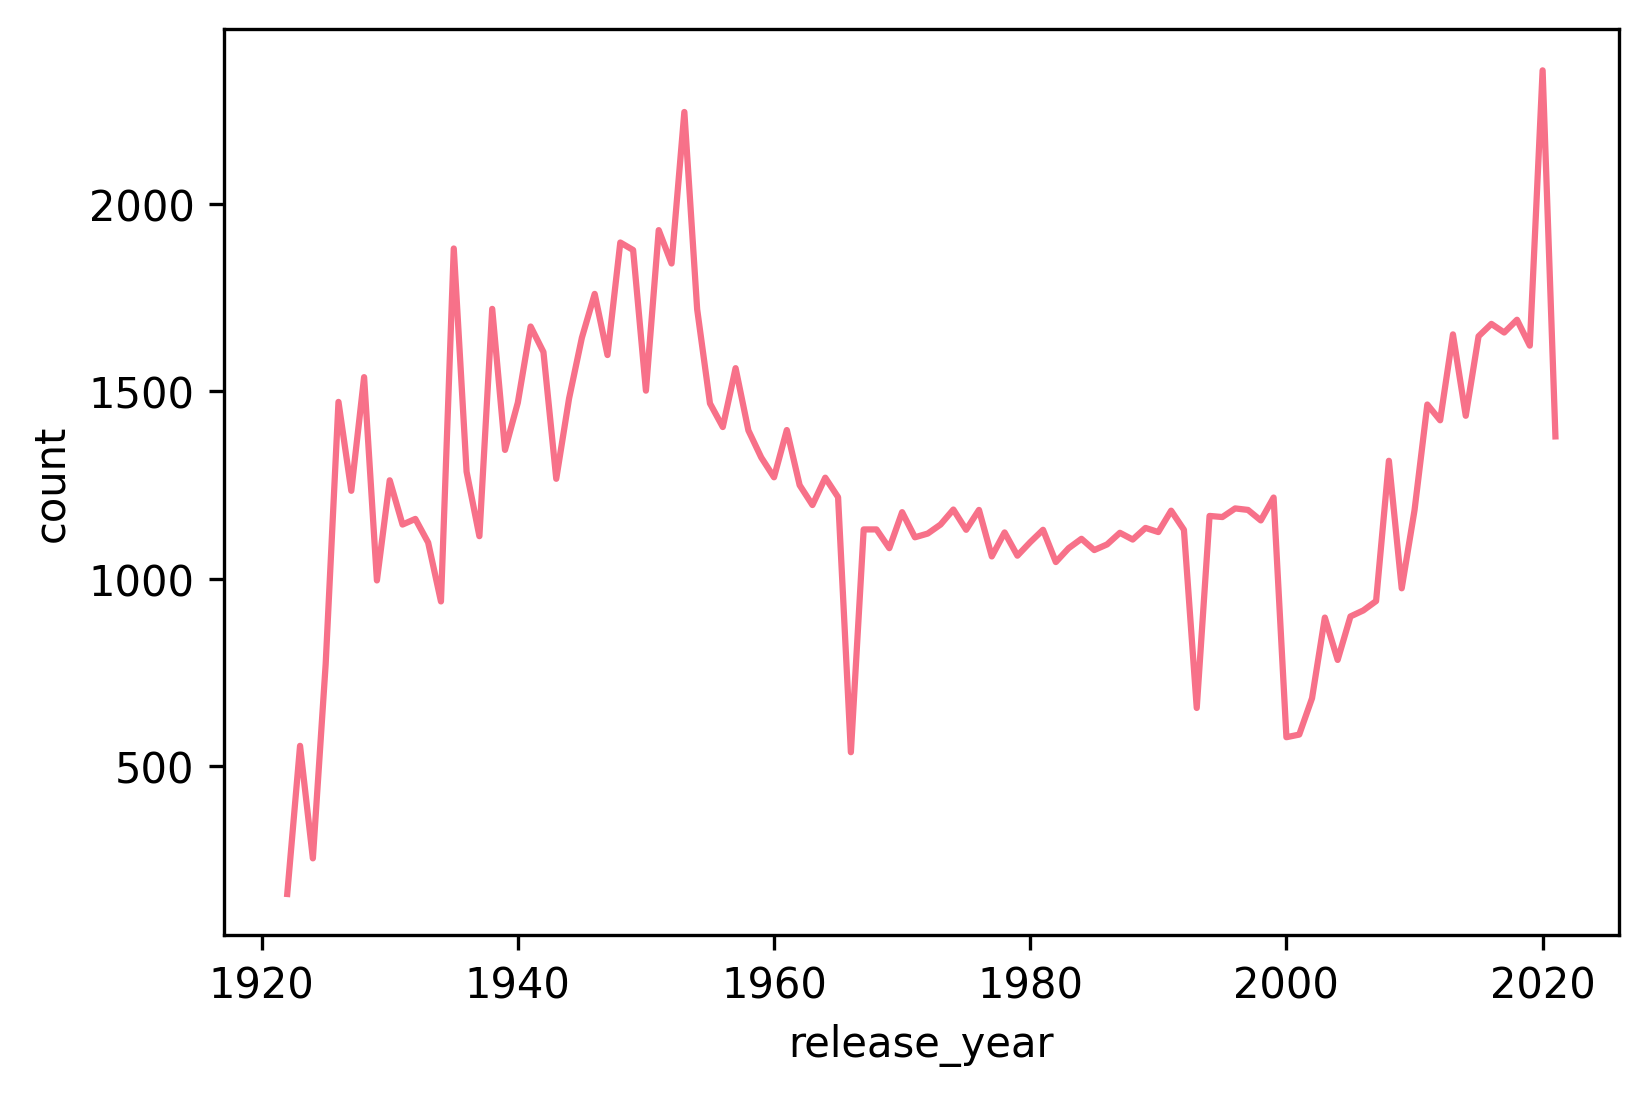

In [181]:
sns.lineplot(data=songs_by_year_stat, x="release_year", y="count")

На графике можно заметить тренд возрастания кол-ва выпускаемых композиций с течением времени.

<AxesSubplot:xlabel='release_year', ylabel='median_popularity'>

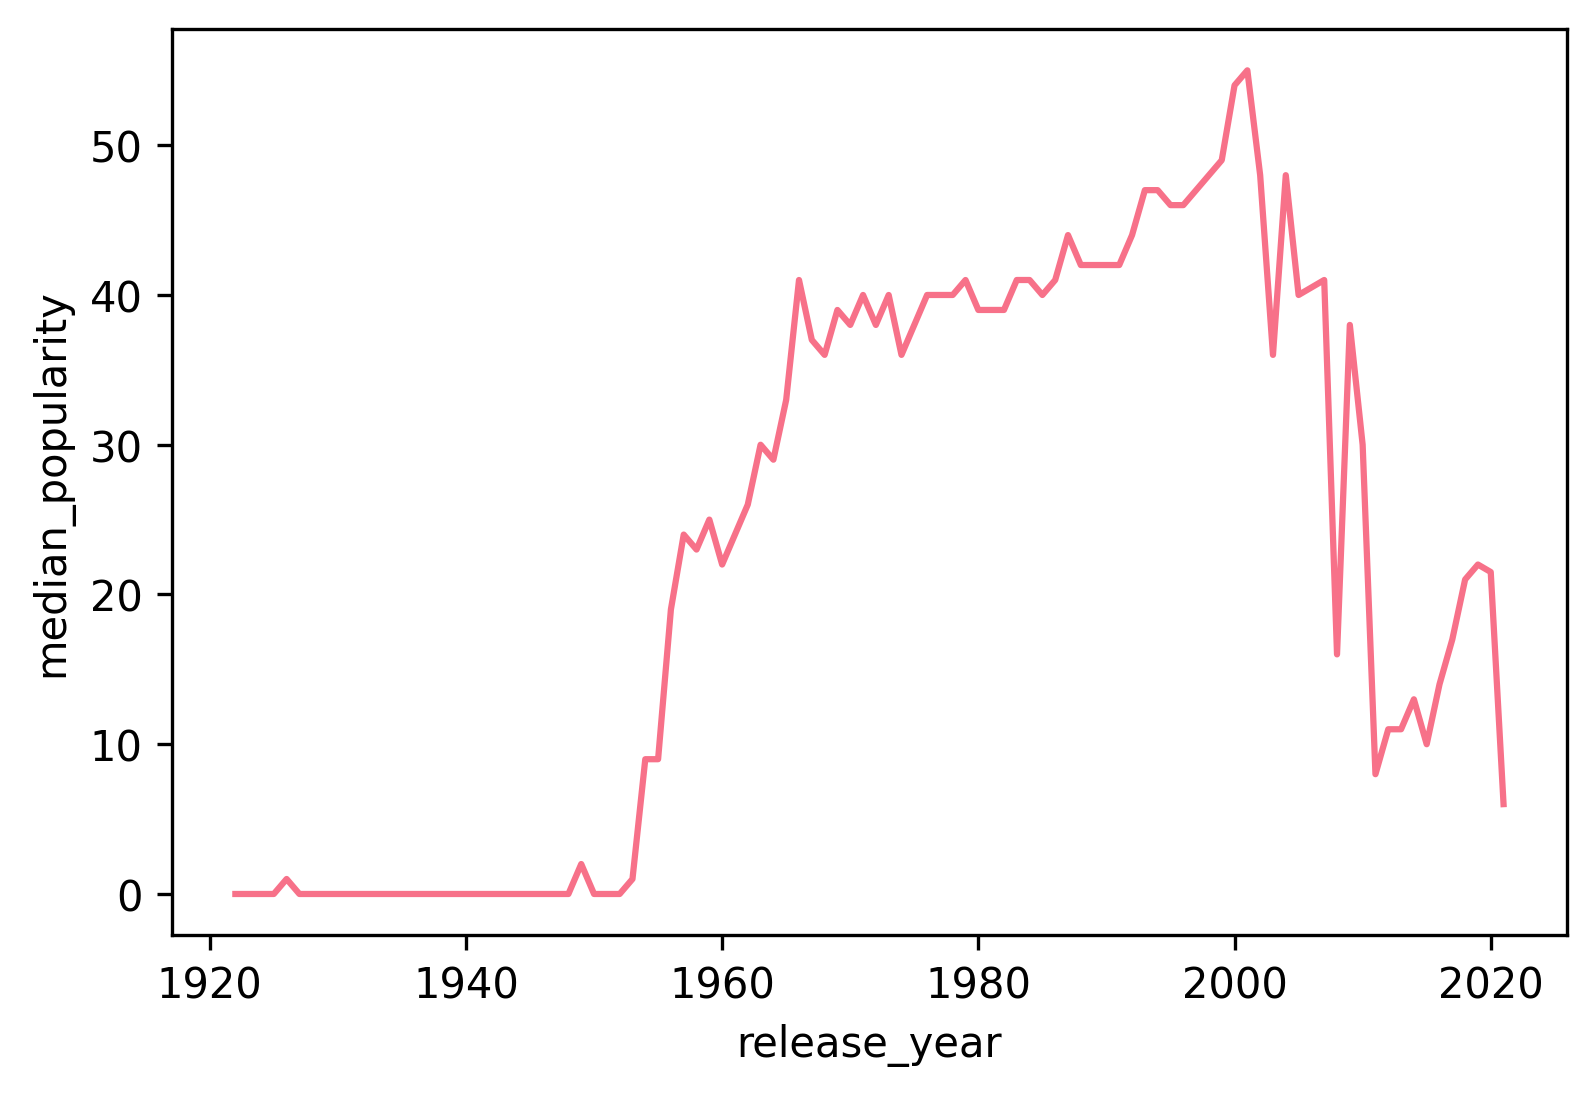

In [182]:
sns.lineplot(data=songs_by_year_stat, x="release_year", y="median_popularity")

На графике виден тренд падения медианной популярности композиций. Данный тренд можно объяснить тем, что растет кол-во новых композиций, что размывает фокус потребителей контента.

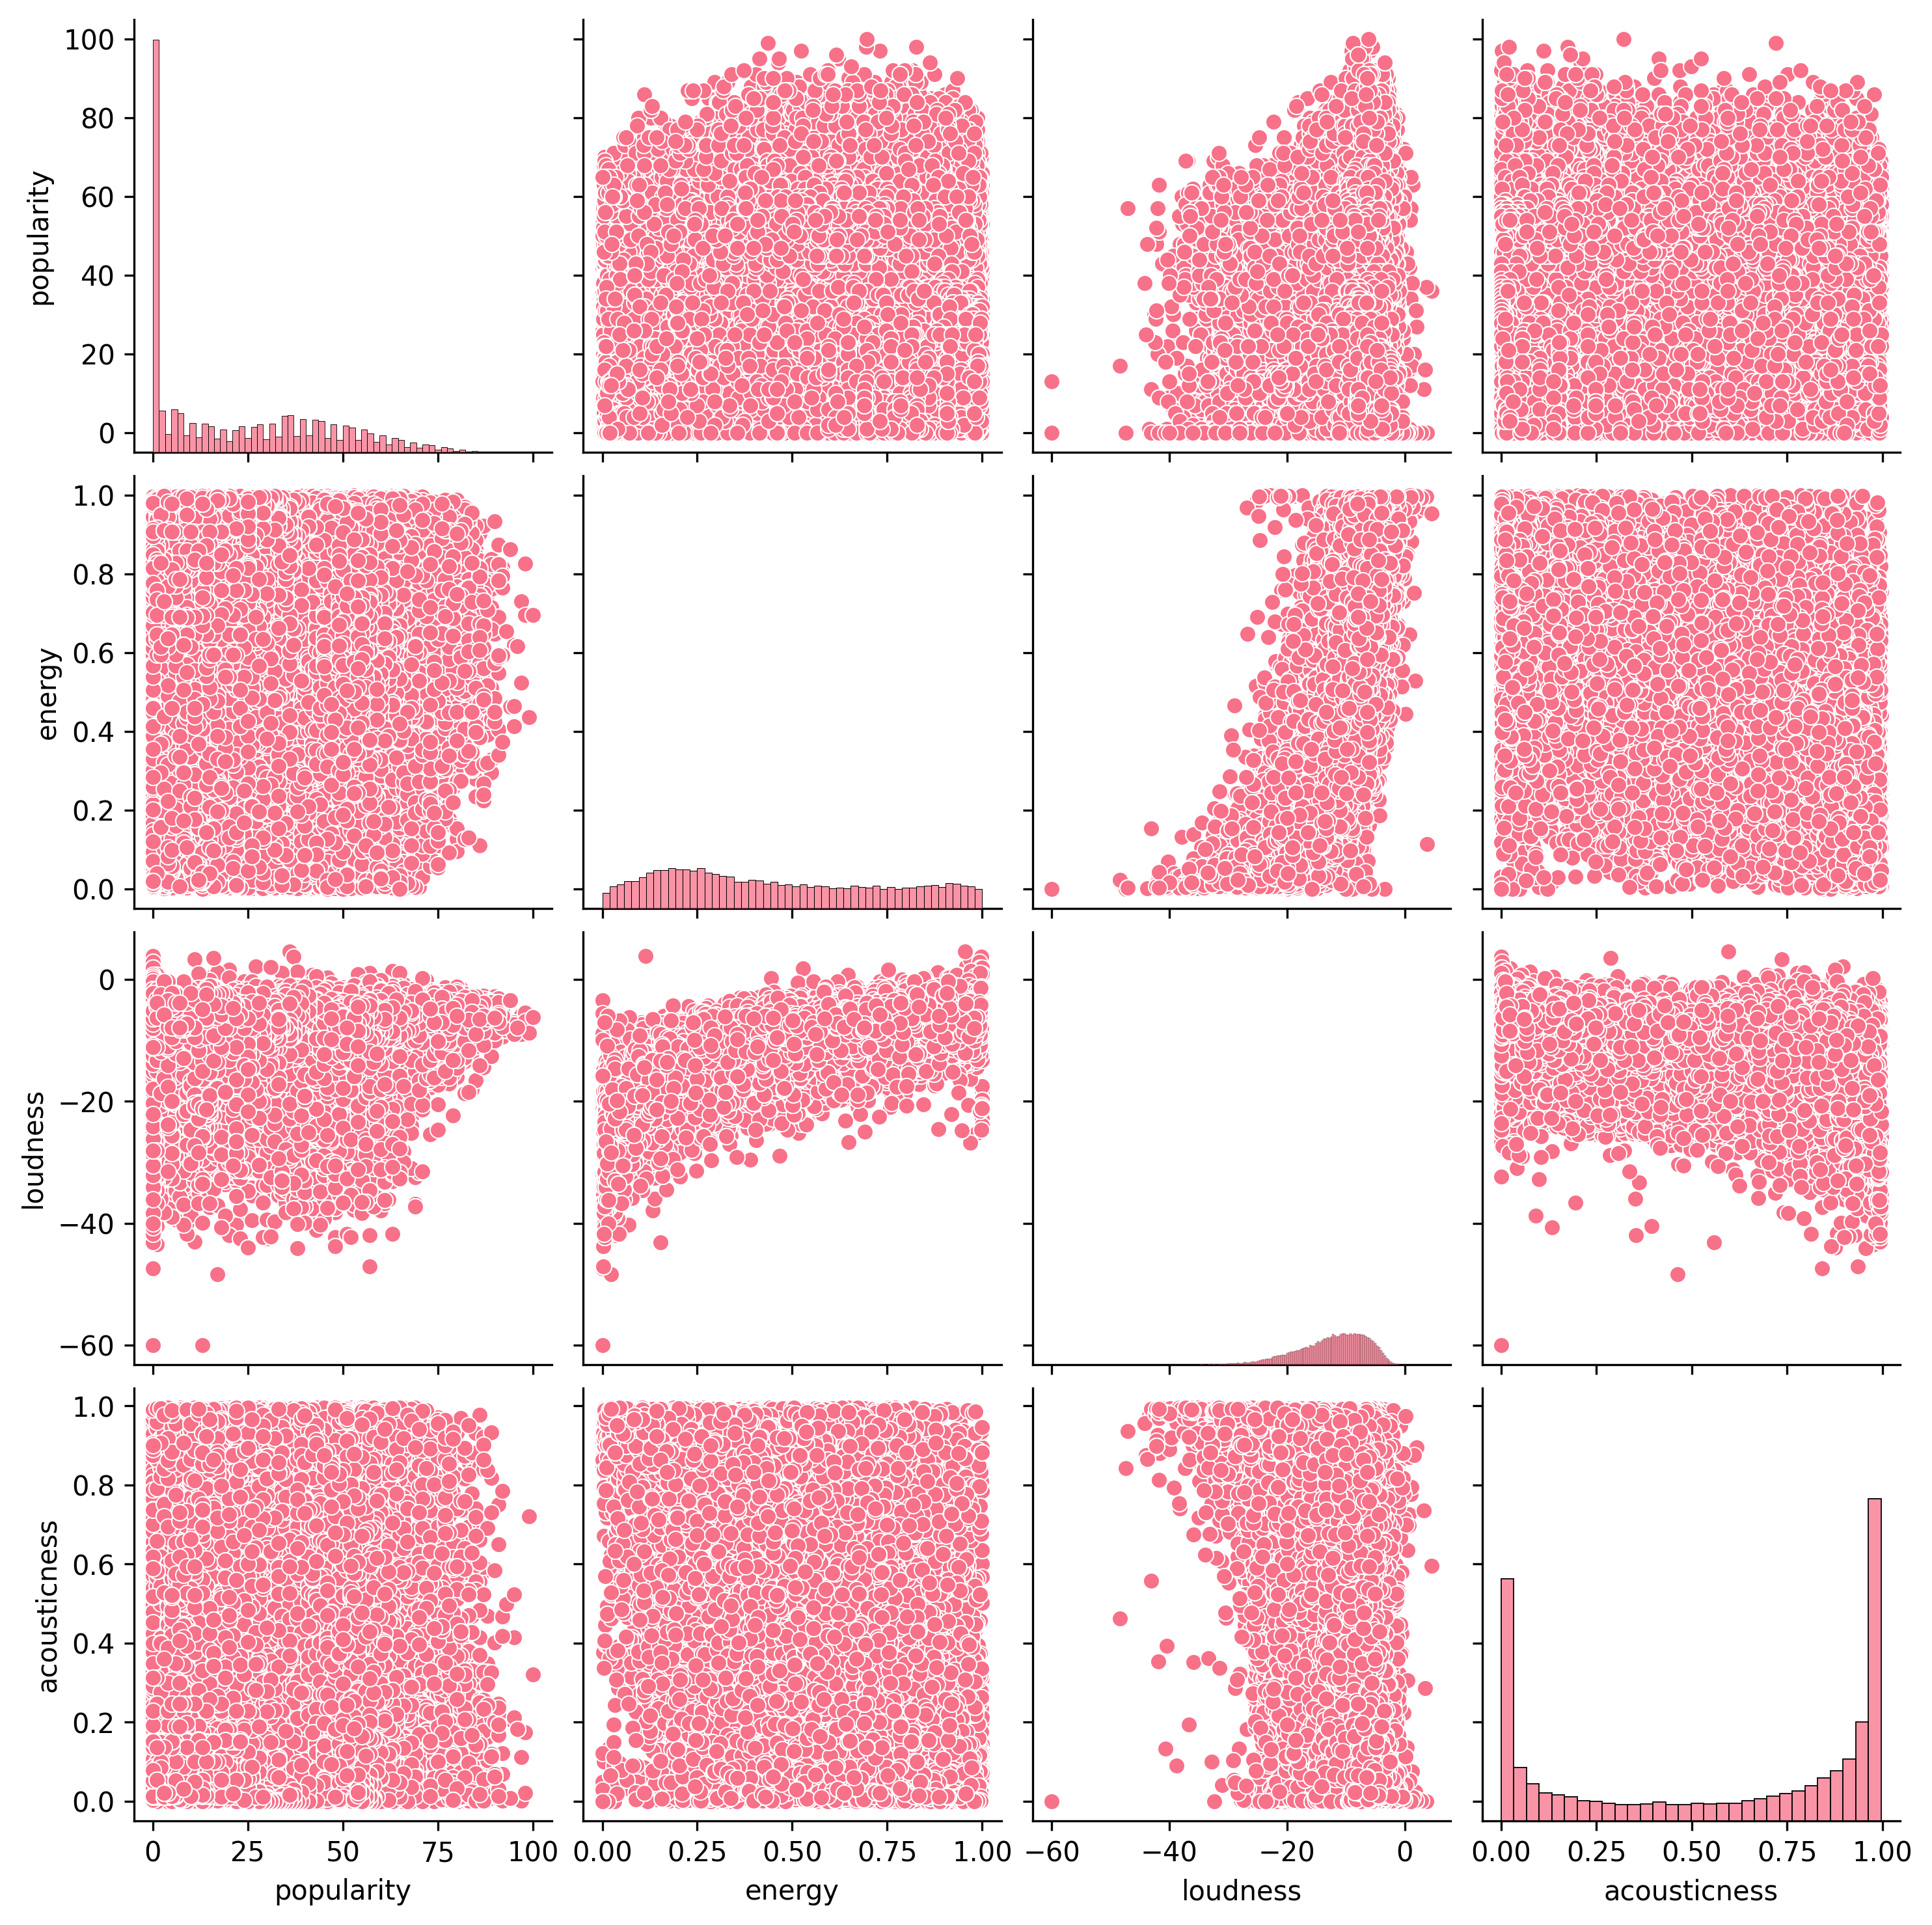

In [183]:
sns.pairplot(data[['popularity', 'energy', 'loudness', 'acousticness']])

Из графиков можно заметить, что рост громкости композиции приводит к росту популярности.